(linalg_basic_def)=
# Basic definitions and operations

We define a column vector $\mathbf{x}$ with a bold lowercase letter (often $( \vec{x} )$ and $( \underline{x} \\$) are used, especially in writing) and a matrix $A$ with an uppercase letter, such that

$ (\mathbf{x}: \quad \mbox{n column vector} \in \mathbb{C}^n \\$
    A: \quad \mbox{m $\times$ n matrix} \in \mathbb{C}^{m \times n}, \\)
$$
    
where $m$ is the number of rows and $n$ is the number of columns in a matrix. The vector $\mathbf{x}$ therefore has entries $x_i$ and the matrix $A$ has entries $a_{ij}$:

$$ \mathbf{x} = \begin{pmatrix}
x_1 \\ 
x_2 \\ 
\vdots \\ 
x_n
\end{pmatrix}, \qquad
A = \begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{pmatrix}. 
$$

Unless explicitly stated otherwise, all vectors in this notebook are column vectors. We will normally write row vectors as the transpose of column vectors:

$$ \begin{pmatrix} x_1 & x_2 & \cdots & x_n \end{pmatrix} = \mathbf{x}^T. $$ 

## Transpose and conjugate transpose

The **transpose** is an operator that swaps the rows and columns of a matrix, so that $A^T$ is an $n \times m$ matrix with entries $a_{ji}$. Similarly, transposing a column vector results in a row vector, and vice versa. In general, for two matrices $A$ and $B$ of appropriate dimensions (i.e. we can add and/or multiply them - see below) and a scalar $\alpha$:

1. $(A + B)^T = A^T + B^T$
2. $(\alpha A)^T = \alpha(A^T)$
3. $(AB)^T = B^TA^T$
4. $(A^T)^T = A$

We also need to define **conjugate (Hermitian) transpose** of a matrix, denoted as $A^*$, $A^H$ and sometimes $A^\dagger$ (*dagger*), which is obtained by taking the transpose and the complex conjugate of each entry:

$$ A^* = (\overline{A})^T = \overline{(A^T)}. $$

Remember that a conjugate of a complex number $z$ changes the sign of the imaginary part: $\overline{z} = \overline{a + ib} = a - ib$. If a matrix is real taking its conjugate leaves it unchanged, of course, since the imaginary part is zero.

Matrix $A$ is **symmetric** if \\( A^T = A \\) and is **hermitian** if $A^* = A$.

The main library for linear algebra in Python is Scipy, which builds on NumPy and NumPy's [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html). NumPy does contain some linear algebra functions, sufficient for basic linear algebra needs.

In [6]:
import numpy as np

A = np.array([[1. + 3.j, 2. - 4.j, 3.],
              [4., 5. + 1.j, 6. - 1.j],
              [7. - 2.j, 8. + 4.j, 9. - 1.j]])

print('A = \n', A)
print('A transpose = \n', A.T)
print('A conj. transpose = \n', A.T.conj())

A = 
 [[1.+3.j 2.-4.j 3.+0.j]
 [4.+0.j 5.+1.j 6.-1.j]
 [7.-2.j 8.+4.j 9.-1.j]]
A transpose = 
 [[1.+3.j 4.+0.j 7.-2.j]
 [2.-4.j 5.+1.j 8.+4.j]
 [3.+0.j 6.-1.j 9.-1.j]]
A conj. transpose = 
 [[1.-3.j 4.-0.j 7.+2.j]
 [2.+4.j 5.-1.j 8.-4.j]
 [3.-0.j 6.+1.j 9.+1.j]]


## Matrix addition and scalar multiplication

Addition (and subtraction) on two matrices (or two vectors) is defined only for matrices with equal dimensions (we say they are *conformable for adition*), as it is performed by entrywise sum.  The resulting matrix will therefore have the same dimensions as the matrices being added. For example,

$$ \begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{pmatrix} + \begin{pmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22}
\end{pmatrix} = \begin{pmatrix}
a_{11} + b_{11} & a_{12} + b_{12} \\
a_{21} + b_{21} & a_{22} + b_{22}
\end{pmatrix}, $$

or more generally

$$ C = A + B, \text{ where } c_{ij} = a_{ij} + b_{ij}.$$

**Properties:** matrix addition is a commutative and an associative operation, i.e. $A + B = B + A$ and $A + (B + C) = (A + B) + C$.

A scalar $\alpha$ multiplying a matrix multiplies each entry of the matrix:

$$ B = \alpha A, \text{ where } b_{ij} = \alpha a_{ij}. $$

**Properties:** this operation is associative and distributive: $(\alpha \beta) A = \alpha (\beta A)$ and $\alpha(A + B) = \alpha A + \alpha B$.

In [7]:
A = np.arange(4.).reshape(2,2)

print('A = \n', A)
print('3*A = \n', 3*A)
print('3*A - A = \n', 3*A - A)

A = 
 [[0. 1.]
 [2. 3.]]
3*A = 
 [[0. 3.]
 [6. 9.]]
3*A - A = 
 [[0. 2.]
 [4. 6.]]


## Matrix-vector multiplication

``` {index} Matrix-vector multiplication
```

Let us consider a general matrix-vector multiplication, which is really just a special case of matrix-matrix multiplication.

$$ \mathbf{b} = A\mathbf{x}, $$

where $A \in \mathbb{C}^{m \times n}$. $A$ and $\mathbf{x}$ are conformable for multiplication iff the number of rows of $\mathbf{x}$ is the same as the number of columns of A, i.e. $\mathbf{x}$ has to be an $n \times 1$ vector. The number of rows of $\mathbf{b}$ will be equal to the number of rows of $A$ and the number of columns will be the same as in $\mathbf{x}$. That means that a product of a matrix and a vector is an $m \times 1$ vector.

The map $\mathbf{x} \mapsto A\mathbf{x}$ is [linear](https://en.wikipedia.org/wiki/Linear_map) as it satisfies

1. $A(\mathbf{x} + \mathbf{y}) = A\mathbf{x} + A\mathbf{y}$
2. $A(\alpha \mathbf{x}) = \alpha A \mathbf{x}$

The entries of $\mathbf{b}$ can be calculated with:

$$ b_i = \sum_{j=1}^n a_{ij}x_j,$$

where $i = 1, \dots, m$. Instead of looking at individual entries $a_{ij}$, let us consider the columns of A (vectors), which we denote as $\mathbf{a}_j \in \mathbb{C}^m$. In *column picture* representation, matrix-vector multiplication can be written as

$$ \mathbf{b} = \sum_{j=1}^n x_j\mathbf{a}_j, $$

or

$$ \begin{pmatrix}
 \\ b \\ \\
\end{pmatrix} = x_1 \begin{pmatrix}
 \\ a_1 \\ \\
\end{pmatrix} + x_2 \begin{pmatrix}
 \\ a_2 \\ \\
\end{pmatrix} + \cdots + x_n \begin{pmatrix}
 \\ a_n \\ \\
\end{pmatrix}, $$

where $\mathbf{a}_1$ is the first column of A and so on. We say that $\mathbf{b}$ is *a linear combination of the columns of $A$*. Let us explain geometrically what this means.

### Example: Geometric interpretation

Consider the following 2-D matrix-vector multiplication which we can easily solve using what was shown above.

$$ \mathbf{b} = \begin{pmatrix}
2 & 1 \\ -2 & 3 \end{pmatrix} 
\begin{pmatrix} 1.5 \\ 2 \end{pmatrix} = 
1.5 \begin{pmatrix} 2 \\ -2 \end{pmatrix} + 
2 \begin{pmatrix} 1 \\ 3 \end{pmatrix} = 
\begin{pmatrix} 3 \\ -3 \end{pmatrix} + 
\begin{pmatrix} 2 \\ 6 \end{pmatrix} = 
\begin{pmatrix} 5 \\ 3 \end{pmatrix}$$

We see that the vector $\mathbf{b}$ is a sum of scaled columns (vectors) of the  matrix, where the scaling factors come from the entries of the vector.

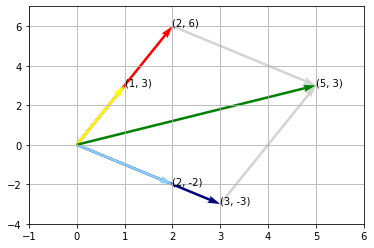

In [8]:
import matplotlib.pyplot as plt


def add_vct(vct, pos=[0, 0], c=None, label=True):
    u, v = vct
    x, y = pos
        
    plt.quiver(x, y, u, v, color=c, angles='xy', scale_units='xy', scale=1)
    
    if label == True:
        plt.annotate((x + u, y + v), (x + u, y + v))
        

add_vct([3, -3], c='navy')
add_vct([2, 6], c='red')
add_vct([2, -2], c='lightskyblue')
add_vct([1, 3], c='yellow')

add_vct([2, 6], pos=[3, -3], c='lightgray', label=False)
add_vct([3, -3], pos=[2, 6], c='lightgray', label=False)

add_vct([5, 3], c='g')

plt.xlim([-1, 6])
plt.ylim([-4, 7])
plt.grid()
plt.show()

## Matrix-matrix multiplication

``` {index} Matrix-matrix multiplication
```

Finally, let us consider a multiplication of two matrices. Two matrices are conformable for multiplication if the number of columns of the first matrix is equal to the number of columns of the second matrix. That is,

$$ C = AB, $$

where $A$ is an $m \times n$ matrix and $B$ is an $n \times p$ matrix. As in the previous section, that means that the resulting $C$ has dimensions $m \times p$ matrix, i.e. it has the same number of rows as $A$ and number of columns as $B$:

$$ (m \times n) \times (n \times p) = (m \times p) $$

The entries of $C$ can be calculated from entries of $A$ and $B$:

$$ c_{ij} = \sum_{k=1}^m a_{ik} b_{kj}. $$

**Properties.** For $A$, $B$ and $C$ of conformable dimensions:
1. $AI$ = $IA$ = $A$, where $I$ is the identity matrix
2. associative: $A(BC) = (AB)C$
3. distributive: $A(B + C) = AB + AC$
4. **not** commutative: $(AB \neq BA )$

In general, matrix multiplication is not commutative, i.e. $( AB \neq BA )$. We therefore need to consider separately what it means to *left-multiply* and *right-multiply* a matrix by another matrix.

Let us explore that by thinking about matrix multiplication in a different way. Let us think of $C = AB$ as $B$ right-multiplying $A$. If we were to explicitly calculate $C$ using the above formula, we could convince ourself that $C = AB$ can be written as:

$$ c_j = A b_j = \sum_{k=1}^m b_{kj}a_k, $$

where $c_j$ is the jth column of $C$ and $a_k$ is the kth column of $A$. From the above formula we see that the columns of $C$ are a linear combination of columns of $A$, with the coefficients coming from $B$.

We can also think of $C = AB$ as matrix $A$ left-multiplying matrix $B$. Thought this way, 

$$ c_i = b_i A = \sum_{k=1}^m a_{ik}b_k, $$

where $c_i$ is the ith row of $C$ and $b_k$ is the kth row of $B$. Now rows of $C$ are a linear combination of rows of $A$. Of course, all of the above views will give the same result.

To help visualise left- and right- multiplication described here, the reader is encouraged to visit [DZone](https://dzone.com/articles/visualizing-matrix). The below examples should additionally help with understanding this.

### Example: rows x matrix, matrix x columns

Consider a simple matrix multiplication:

$$C = AB = \begin{pmatrix} 2 & 1 \\ -2 & 3 \end{pmatrix} 
\begin{pmatrix} 5 & 0 \\ 2 & 4 \end{pmatrix} $$

Let us look at the *row picture* first and focus on the first row of $A$, $a_1 = (2, 1)$. Following the formula from above, this means that the first row of $C$ will be $2 \times$ first row of $B + 1 \times$ second row of $B$. So the first row of $C$ is \\( = 2(5, 0) + 1(2, 4) = (12, 4)\\). Similarly, the second row of $C$ is \\( = -2(5, 0) + 3(2, 4) = (-4, 12)\\).

We should get the same product if we do column multiplication. For easier notation and formatting, here we will represent column vectors as transposed row vectors. The first column of $B$ is $(5, 2)^T$, which means that the first column of $C$ will be $5 \times$ first column of $A + 2 \times$ second column of $A$. The first column of $C$ is therefore $( = 5(2, -2)^T + 2(1, 3)^T = (12, -4)^T)$. Similarly for the second column of $C$, which is $( = 0(2, -2)^T + 4(1, 3)^T = (4, 12)^T.)$

$$AB = \begin{pmatrix} 2 & 1 \\ -2 & 3 \end{pmatrix} 
\begin{pmatrix} 5 & 0 \\ 2 & 4 \end{pmatrix} =
\begin{pmatrix} 12 & 4 \\ -4 & 12 \end{pmatrix} = C$$

Let us use Python to verify that the result is indeed correct.

In [9]:
A = np.array([[2, 1],
              [-2, 3]])
B = np.array([[5, 0],
              [2, 4]])

print('A @ B = \n', A @ B)

A @ B = 
 [[12  4]
 [-4 12]]


### Example: Permutations

``` {index} Permutations
```

Matrix permutations are esentially acts of rearranging the entries of a matrix. We permute a matrix $A$ by left- or right-multiplying it with a permutation matrix. A [permutation matrix](https://en.wikipedia.org/wiki/Permutation_matrix) $P$ is a square matrix where every row and every column has a single 1 element and 0's elsewhere.

Consider a simple $3 \times 3$ matrix $A$:

$$ A = \begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{pmatrix}. $$

Let us think how we would, for example, swap the first and third row of this matrix. Remember that if we want to act on the rows of $A$ we need to left-multiply it by another matrix. In this case, this will be the permutation matrix $P$ which also has to be $3 \times 3$. This is how we would achieve this:

$$ PA =  
\begin{pmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 0 \end{pmatrix}
\begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{pmatrix} = 
\begin{pmatrix} 7 & 8 & 9 \\ 4 & 5 & 6 \\ 1 & 2 & 3 \end{pmatrix} = B,$$

where $B$ is the product of $PA$. What does the first row of $P$ do? The first row of $P$ is $(0, 0, 1)$ and it means that the first row of $B$ will be the following linear combination of the rows of $A$: $0(1, 2, 3) + 0(4, 5, 6) + 1(7, 8, 9)$. That is, the first row of $B$ will be just the last row of $A$. The second row of $P$ is $(0, 1, 0)$ and it means that the second row of $B$ will be equal to the second row of $A$, i.e. it will remain unchanged. The last row of $P$ is $(1, 0, 0)$ which means that the last row of $B$ will be equal to the first row of $A$.

Let us now imagine we want to swap the first and second columns of $A$. Remember that now we have to right-multiply since we are acting on the columns of $A$. We will again provide the solution and then explain how we got to it.

$$ AP = 
\begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{pmatrix} 
\begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{pmatrix} =
\begin{pmatrix} 2 & 1 & 3 \\ 5 & 4 & 6 \\ 8 & 7 & 9 \end{pmatrix} = B$$

We now need to look at the columns of $P$. If we want the first column of $B$ to be equal to the second column of $A$, the first column of $P$ must be $(0, 1, 0)^T$. Then the first column of $B$ is the following linear combination of the columns of $A$: $0(1, 4, 7)^T + 1(2, 5, 8)^T + 0(3, 6, 9)^T = (2, 5, 8)^T$, where we again denote column vectors as the transposed row vectors for easier formatting. Similarly for the second and third column.

What if we wanted to swap the rows or columns back to their original positions? This requires us to find an *inverse matrix* of the permutation matrix, which would 'reverse' the permutation. In this case, the inverse is easily found: to swap the first and second row back, we simply need to swap them again! That means that the permutation matrix is equal to its inverse, $P^{-1} = P$. More about inverse matrices later.

### Example: Inner and outer product

``` {index} Inner product
```

``` {index} Outer product
```

Let us consider another special case of matrix-matrix multiplication: multiplication of two vectors $\mathbf{u} \in \mathbb{R}^m$ and $\mathbf{v} \in \mathbb{R}^n$.

The dot product of two vectors $\mathbf{u}$ and $\mathbf{v}$ is often called the *inner product* and is written like this in vector notation:

$$ \mathbf{u}^T \mathbf{v} = \begin{bmatrix}
u_1 & u_2 & \cdots & u_m \end{bmatrix} \begin{bmatrix}
\\ \mathbf{v} \\ \\
\end{bmatrix} = \sum_{i=1}^m u_i v_i. $$

Note that here $m$ must be equal to $n$. The product is a scalar, so it is also called a *scalar product*. A special type of inner product $\mathbf{u}^T \mathbf{u}$ is called the *Euclidean norm* or Euclidean distance, and it represents the *length* of a vector $\mathbf{u}$. We cover this and other norms in more detail in another notebook.

Similarly for the **outer product**, but now the product will be a matrix whose columns are simply linear combinations of $\mathbf{u}$.

$$ \mathbf{u} \mathbf{v}^T = 
\begin{bmatrix} \\ \mathbf{u} \\ \\ \end{bmatrix} 
\begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix} =
\left[ \begin{array}{c|c|c|c|c} \\ v_1 \mathbf{u} & v_2 \mathbf{u} & \cdots & v_n \mathbf{u}\\ \\ \end{array} \right]$$

Let us check this in Python with vectors $u = (1, 2, 3)^T$ and $v = (4, 5, 6)^T$.

In [10]:
u = np.array([1, 2, 3]).reshape(-1, 1)
v = np.array([4, 5, 6]).reshape(-1, 1)

print('u = \n', u)
print('v = \n', v )
      
print('\nu.T @ v = \n', u.T @ v)
print('\nu @ v.T = \n', u @ v.T)

u = 
 [[1]
 [2]
 [3]]
v = 
 [[4]
 [5]
 [6]]

u.T @ v = 
 [[32]]

u @ v.T = 
 [[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


---

# Linear transformations

``` {index} Linear transformation
```

Let us think what linear transformations (or maps or functions) actually mean. A function $f(\cdot)$ represents our linear transformation, it means that

$$ f(\mathbf{x} + \mathbf{y}) = f(\mathbf{x}) + f(\mathbf{y}) \\
f(\alpha \mathbf{x}) = \alpha f(\mathbf{x}),$$

for any vectors $\mathbf{x}, \mathbf{y}$, for example, and any scalar $c$. 

Almost everything we encountered in this notebook is a linear transformation! In fact, matrices are examples of linear maps. We can think of matrix-vector multiplication $A \mathbf{x} = \mathbf{b}$ as a vector $\mathbf{x}$ being transformed into a new vector $\mathbf{b}$. Let us look at a few examples of that.

## Rotation

A *rotation matrix* for counterclockwise rotation with angle $\varphi$ is defined as:

$$ \begin{pmatrix} \cos \varphi & -\sin \varphi \\ \sin \varphi & \cos \varphi \end{pmatrix}. $$

Our mapping is then:

$$ \begin{pmatrix} \cos \varphi & -\sin \varphi \\ \sin \varphi & \cos \varphi \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} x \cos \varphi - y \sin \varphi \\ x \sin \varphi + y \cos \varphi \end{pmatrix},$$

or equivalently:

$$ (x, y) \mapsto (x \cos \varphi - y \sin \varphi, x \sin \varphi + y \cos \varphi). $$

## Shearing

The horizontal and vertical shearing transformation matrices are defined, respectively, as:

$$ \begin{pmatrix} 1 & \tan \psi \\ 0 & 1 \end{pmatrix}, \quad \begin{pmatrix} 1 & 0 \\ \tan \psi & 1 \end{pmatrix}, $$

where $\psi$ is the shear angle. And the respective mappings are:

$$ (x, y) \mapsto (x + y \tan \psi, y) \\ 
(x, y) \mapsto (x, x \tan \psi + y).$$

## Squeezing

The squeezing transformation matrix is defined as:

$$ \begin{pmatrix} k & 0 \\ 0 & 1/k \end{pmatrix}, \quad k \in \mathbb{R}.$$

The mapping is:

$$ (x, y) \mapsto (kx, y/k). $$

### Example with Python:

Let us apply these three mappings to unit vectors $(1, 0)^T, (0, 1)^T$. We will rotate by $\varphi = 30^\circ$, squeeze by a factor $k = 1.3$ and shear horizontally by $\psi = 45^\circ$ from the vertical.

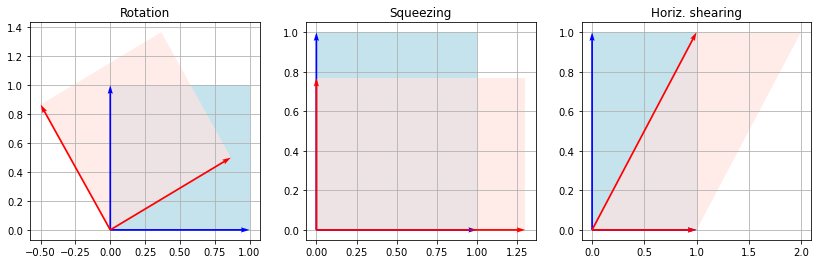

In [14]:
from matplotlib.patches import Polygon


def add_vcts(v1, v2, color='k', fcolor=None):
    ax.quiver(v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color=color, zorder=10)
    ax.quiver(v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color=color, zorder=10)
    ax.add_patch(Polygon([np.zeros(2,),v1,v1+v2,v2], fc=fcolor, alpha=0.7))


titles = ['Rotation', 'Squeezing', 'Horiz. shearing']

# unit vectors
i = np.array([1,0])
j = np.array([0,1])

# rotation
phi = np.pi / 6
R = np.array([[np.cos(phi), -np.sin(phi)],
              [np.sin(phi), np.cos(phi)]]) 

# squeezing
k = 1.3
S = np.array([[k, 0], [0, 1/k]])

# shearing
psi = np.pi / 4
P = np.array([[1, np.tan(psi)], [0, 1]])

fig = plt.figure(figsize=(14, 4))
for n in range(1, 4):
    ax = fig.add_subplot(1, 3, n) 
    ax.set_title(titles[n-1])
    ax.grid(True)
    
    if n == 1:
        i_ = R @ i
        j_ = R @ j
    elif n == 2:
        i_ = S @ i
        j_ = S @ j
    else:
        i_ = P@i
        j_ = P@j
    
    add_vcts(i, j, 'b', 'lightblue')
    add_vcts(i_, j_, 'r', 'mistyrose')

## General transformation

Now consider a general matrix

$$ \begin{pmatrix} a & b \\ c & d \end{pmatrix}. $$

And let us think about how it transform the unit vectors  

$$ \begin{pmatrix} a & b \\ c & d \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} a \\ c \end{pmatrix}, \qquad 
\begin{pmatrix} a & b \\ c & d \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} b \\ d \end{pmatrix}.$$

The matrix transformed our unit vectors into new vectors which are just the columns of the matrix. Let us plot this using Python:

[0.9 0.6] [0.2 1.1]
[1.1 1.7]


(-0.2, 2.2)

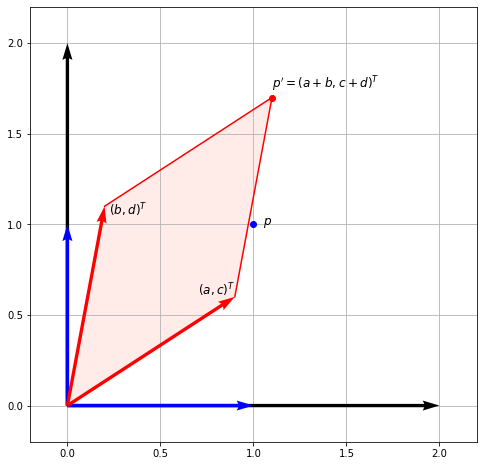

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.grid(True)

ax.quiver(2,0, angles='xy', scale_units='xy', scale=1, color='k', zorder=10)
ax.quiver(0,2, angles='xy', scale_units='xy', scale=1, color='k', zorder=10)

ax.quiver(1,0, angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax.quiver(0,1, angles='xy', scale_units='xy', scale=1, color='b', zorder=10)

# basis functions
i = np.array([1,0])
j = np.array([0,1])

# transform them
A = np.array([[0.9,0.2],[0.6,1.1]])
i_ = A @ i
j_ = A @ j
print(i_,j_)
# some borders
add_vcts(i_, j_, color='r', fcolor='mistyrose')
ax.plot([i_[0],i_[0]+j_[0]], [i_[1],i_[1]+j_[1]], color='r', zorder=10)
ax.plot([j_[0],i_[0]+j_[0]], [j_[1],i_[1]+j_[1]], color='r', zorder=10)

p = i+j  # point (1, 1)
p_ = A @ p  # transform p
print(p_)
# plot the points
ax.plot(p[0], p[1], 'bo')
ax.plot(p_[0],p_[1],'ro')

# add some text
ax.text(p[0] + 0.05,p[1], "$p$", fontsize=12)
ax.text(p_[0],p_[1]+0.05, "$p'=(a+b,c+d)^T$", fontsize=12)
ax.text(i_[0]-0.2,i_[1]+0.01, "$(a,c)^T$", fontsize=12)
ax.text(j_[0]+0.025,j_[1]-0.05, "$(b,d)^T$", fontsize=12)

ax.set_xlim(-0.2,2.2)
ax.set_ylim(-0.2,2.2)

From this figure we could find that the area of the red parallelogram to be equal to $ad - bc$. This is equal to the cross product of the vectors $(a, c)^T$ and $(b, d)^T$, which are the columns of our matrix. We actually define the determinant of the matrix as the area of this parallelogram - but more on this in another notebook.